The script is used for preprocessing NEMSIS_concate_all.csv and produce train, val, test files for protocol selection

In [8]:
import pandas as pd
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
root = '/standard/UVA-DSA/NEMSIS/2021'

In [9]:
df = pd.read_csv(os.path.join(root, 'concate', 'NEMSIS_concate_all.csv'))
df.head(5)

,PcrKey,Cause of Injury,Primary Symptoms,Other Associated Symptoms,Primary Impressions,Secondary Impressions,Medications,Procedures,Protocols,Protocol Age Category,Chief Complaints,Gender,Age,Age Unit
0,1472192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Other Appropriate Choice,NaN,NaN,NaN
1,13273412.0,NaN,Shortness of breath,Encounter for adult health check-up NOS,ARDS,Influenza due to unidentified influenza virus,NaN,NaN,NaN,NaN,Sick Person,Male,78.0,Years
2,14548133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Convulsions/Seizure,Female,54.0,Years
3,21699657.0,NaN,Hematuria,Generalized pain NOS,"Foreign body in genitourinary tract, part unsp...","Acute pain, not elsewhere classified",NaN,NaN,NaN,NaN,Sick Person,Male,84.0,Years
4,21719864.0,NaN,Severe abdominal pain (generalized) (with abdo...,NaN,Severe abdominal pain (generalized) (with abdo...,NaN,NaN,NaN,NaN,NaN,Abdominal Pain/Problems,Female,35.0,Years


In [10]:
df = df.dropna(subset=["Protocols"]).reset_index(drop=True)
df = df.replace(np.nan, None)
df.head(5)

,PcrKey,Cause of Injury,Primary Symptoms,Other Associated Symptoms,Primary Impressions,Secondary Impressions,Medications,Procedures,Protocols,Protocol Age Category,Chief Complaints,Gender,Age,Age Unit
0,81481800.0,None,Generalized pain NOS,"Elevated blood-pressure reading, without diagn...",Generalized pain NOS,None,None,Evaluation procedure (procedure),General-Universal Patient Care/ Initial Patien...,General,Traumatic Injury,Male,3.0,Years
1,97455081.0,None,Encounter for adult health check-up NOS,None,Encounter for observation for suspected exposu...,None,None,None,General-Universal Patient Care/ Initial Patien...,None,Transfer/Interfacility/Palliative Care,Male,77.0,Years
2,118170828.0,None,Primary thunderclap headache,Other general symptoms and signs,Headache,"Pregnancy related conditions, unspecified, uns...",None,Continuous physical assessment (procedure),General-Universal Patient Care/ Initial Patien...,Adult Only,Headache,Female,23.0,Years
3,118170835.0,None,"Chest pain, unspecified",None,"Cardiac arrhythmia, unspecified",Epileptic fits NOS,diltiazem,Catheterization of vein (procedure);Taking ort...,General-Universal Patient Care/ Initial Patien...,General,Convulsions/Seizure,Female,40.0,Years
4,118170842.0,Assault by bodily force,Unspecified injury of shoulder and upper arm,Injury of face NOS,"Injury, unspecified",None,None,Continuous physical assessment (procedure),General-Universal Patient Care/ Initial Patien...,General,Assault,Female,26.0,Years


In [11]:
narratives = []

for i in tqdm(range(len(df))):
    cause_of_injury = df['Cause of Injury'][i]
    primary_symptoms = df['Primary Symptoms'][i]
    other_associated_symptoms = df['Other Associated Symptoms'][i]
    primary_impressions = df['Primary Impressions'][i]
    secondary_impressions = df['Secondary Impressions'][i]
    chief_complaints = df['Chief Complaints'][i]
    
    narrative = ''
    
    if chief_complaints != None:
        narrative += 'The patient has chief complaint: {}. '.format(chief_complaints)
    
    if primary_symptoms != None:
        narrative += 'The patient has the primary symptoms: {}. '.format(primary_symptoms)
        
    if other_associated_symptoms != None:
        narrative += 'Other associated symptoms including {} were found. '.format(other_associated_symptoms)
        
    if primary_impressions != None:
        narrative += 'The primary impression for the patient is {}. '.format(primary_impressions)
        
    if secondary_impressions != None:
        narrative += 'The secondary impression for the patient is {}. '.format(secondary_impressions)
    
    if cause_of_injury != None:
        narrative += 'The patient was found injured, the cause of injury is {}. '.format(cause_of_injury)
    
    narrative = narrative.strip()
    narratives.append(narrative)

  0%|          | 2693/15221143 [00:00<09:25, 26920.14it/s]

 27%|██▋       | 4090577/15221143 [02:28<06:43, 27561.52it/s]


KeyboardInterrupt: 

In [5]:
df['Narrative'] = narratives
df

,PcrKey,Cause of Injury,Primary Symptoms,Other Associated Symptoms,Primary Impressions,Secondary Impressions,Medications,Procedures,Protocols,Protocol Age Category,Chief Complaints,Gender,Age,Age Unit,Narrative
0,81481800.0,None,Generalized pain NOS,"Elevated blood-pressure reading, without diagn...",Generalized pain NOS,None,None,Evaluation procedure (procedure),General-Universal Patient Care/ Initial Patien...,General,Traumatic Injury,Male,3.0,Years,The patient has chief complaint: Traumatic Inj...
1,97455081.0,None,Encounter for adult health check-up NOS,None,Encounter for observation for suspected exposu...,None,None,None,General-Universal Patient Care/ Initial Patien...,None,Transfer/Interfacility/Palliative Care,Male,77.0,Years,The patient has chief complaint: Transfer/Inte...
2,118170828.0,None,Primary thunderclap headache,Other general symptoms and signs,Headache,"Pregnancy related conditions, unspecified, uns...",None,Continuous physical assessment (procedure),General-Universal Patient Care/ Initial Patien...,Adult Only,Headache,Female,23.0,Years,The patient has chief complaint: Headache. The...
3,118170835.0,None,"Chest pain, unspecified",None,"Cardiac arrhythmia, unspecified",Epileptic fits NOS,diltiazem,Catheterization of vein (procedure);Taking ort...,General-Universal Patient Care/ Initial Patien...,General,Convulsions/Seizure,Female,40.0,Years,The patient has chief complaint: Convulsions/S...
4,118170842.0,Assault by bodily force,Unspecified injury of shoulder and upper arm,Injury of face NOS,"Injury, unspecified",None,None,Continuous physical assessment (procedure),General-Universal Patient Care/ Initial Patien...,General,Assault,Female,26.0,Years,The patient has chief complaint: Assault. The ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15221138,182534325.0,"Fall on same level from slipping, tripping and...",Hypoxemia,"Vomiting, unspecified",Unspecified infectious disease,Asthenia NOS,Zofran,3 lead electrocardiographic monitoring (proced...,Other;Injury-Multisystem,Adult Only;Adult Only,Sick Person,Male,85.0,Years,The patient has chief complaint: Sick Person. ...
15221139,182534328.0,"Fall on same level from slipping, tripping and...",Hypoxemia,Asthenia NOS,Dehydration,Asthenia NOS;ARDS,None,3 lead electrocardiographic monitoring (proced...,Other,Adult Only,Breathing Problem,Female,71.0,Years,The patient has chief complaint: Breathing Pro...
15221140,182534338.0,Fall from bed,Change in mental status NOS,Severe abdominal pain (generalized) (with abdo...,Generalized abdominal pain,Change in mental status NOS,None,Catheterization of vein (procedure);Glucose me...,Medical-Altered Mental Status;Medical-Abdomina...,Adult Only;Adult Only,Unconscious/Fainting/Near-Fainting,Female,88.0,Years,The patient has chief complaint: Unconscious/F...
15221141,182534407.0,None,Encounter for adult health check-up NOS,None,Encounter for adult health check-up NOS,None,None,Continuous physical assessment (procedure);Tak...,General-Universal Patient Care/ Initial Patien...,General,Transfer/Interfacility/Palliative Care,Male,79.0,Years,The patient has chief complaint: Transfer/Inte...


check if there's empty string in narrative

In [6]:
for i, test in enumerate(list(df['Narrative'].values)):
    if test == "":
        print(i)

In [7]:
df.to_csv(os.path.join(root, 'NEMSIS_all.xlsx'), index=False)

### dataset statistics

In [12]:
import matplotlib.pyplot as plt
import textwrap


In [13]:
df = pd.read_csv(os.path.join(root, 'NEMSIS_all.xlsx'))

In [4]:
df['Narrative'][0]

'The patient has chief complaint: Traumatic Injury. The patient has the primary symptoms: Generalized pain NOS. Other associated symptoms including Elevated blood-pressure reading, without diagnosis of hypertension were found. The primary impression for the patient is Generalized pain NOS.'

## Cardiac Emergencies

In [101]:
cardiac_cases = df[df['Protocols'].str.contains('Cardiac|chest')].reset_index(drop=True)

In [102]:
print(cardiac_cases['Protocols'])

0                                    General-Cardiac Arrest
1         General-Universal Patient Care/ Initial Patien...
2         Medical-Cardiac Chest Pain;General-Universal P...
3                                Medical-Cardiac Chest Pain
4                                   Cardiac Arrest-Asystole
                                ...                        
535538                               General-Cardiac Arrest
535539                           Medical-Cardiac Chest Pain
535540                           Medical-Cardiac Chest Pain
535541                           Medical-Cardiac Chest Pain
535542                     Other;Medical-Cardiac Chest Pain
Name: Protocols, Length: 535543, dtype: object


In [103]:
num_cardiac_cases = len(cardiac_cases)
total_cases = len(df)   
# Calculate the percentage
percentage = (num_cardiac_cases / total_cases) * 100
print(f'Number of cases with cardiac related protocols: {num_cardiac_cases}')
print(f'Percentage of cases with cardiac related protocols: {percentage:.2f}%')

Number of cases with cardiac related protocols: 535543
Percentage of cases with cardiac related protocols: 3.52%


### Primary impression that has cardiac related

In [43]:
pi_cardiac_df = df[df['Primary Impressions'].str.contains('chest pain|cardiac', case=False, na=False)] #primary impression


In [42]:
cardiac_impressions = len(pi_cardiac_df)
total_cases = len(df)   
# Calculate the percentage
percentage = (cardiac_impressions / total_cases) * 100
print(f'Percentage of cases with cardiac related impressions: {percentage:.2f}%')

Percentage of cases with cardiac related impressions: 5.50%


In [63]:
print(cardiac_impressions)

837735


### Primary symptoms that has cardiac related

In [44]:
ps_cardiac_df = df[df['Primary Symptoms'].str.contains('chest pain|cardiac|tightness|shortness', case=False, na=False)]  #primary symptoms

cardiac_symptomps = len(ps_cardiac_df)
total_cases = len(df)   
# Calculate the percentage
percentage = (cardiac_symptomps / total_cases) * 100
print(f'Percentage of cases with cardiac related symptoms: {percentage:.2f}%')

Percentage of cases with cardiac related symptoms: 7.87%


In [64]:
cardiac_symptomps

1198411

### Narrative that has cardiac related 

In [61]:
narrative_cardiac_df = df[df['Narrative'].str.contains('chest pain|cardiac|tightness|shortness of breath|tingling|heart', case=False, na=False)]  #primary symptoms

num_cardiac_narratives = len(narrative_cardiac_df)
total_cases = len(df)   
# Calculate the percentage
percentage = (num_cardiac_narratives / total_cases) * 100
print(f'Percentage of cases with cardiac related narratives: {percentage:.2f}%')

Percentage of cases with cardiac related narratives: 15.09%


In [62]:
num_cardiac_narratives

2297437

# Respiratory Emergencies

In [65]:
respiratory_cases = df[df['Protocols'].str.contains('Respiratory')].reset_index(drop=True)

In [100]:
num_respiratory_cases = len(respiratory_cases)
total_cases = len(df)   
# Calculate the percentage
percentage = (num_respiratory_cases / total_cases) * 100
print(f'Number of cases with respiratory protocols: {num_respiratory_cases}')
print(f'Percentage of cases with respiratory protocols: {percentage:.2f}%')

Number of cases with respiratory protocols: 526690
Percentage of cases with respiratory protocols: 3.46%


In [80]:
print(respiratory_cases['Primary Symptoms'].unique())

['ARDS' 'Shortness of breath' 'Other allergy' 'Dyspnea, unspecified'
 'Other general symptoms and signs' 'Change in mental status NOS'
 'Dysphasia' 'Asthenia NOS' 'Fatigue NOS' 'Pulmonary edema'
 'Pharyngitis (acute) NOS' 'Other asthma' 'Cough' 'Wheezing'
 'Food in trachea causing asphyxiation' 'Rapid heart beat'
 'Edema, unspecified' 'Nausea with vomiting, unspecified'
 'Other foreign object in respiratory tract, part unspecified'
 'Fever with chills'
 'Encounter for general examination without complaint, suspected or reported diagnosis'
 'Encounter for adult health check-up NOS' 'Abdominal and pelvic pain'
 'Disorientation, unspecified' 'Diarrhea, unspecified' nan 'Night sweats'
 'Pneumonia, unspecified organism' 'Chronic obstructive lung disease NOS'
 'Anxiety NOS' 'Injury, unspecified'
 'Acute respiratory failure, unspecified whether with hypoxia or hypercapnia'
 'Other forms of dyspnea' 'Painful respiration' 'Periodic breathing'
 'Nausea' 'Chest pain, unspecified' 'Unspecified ast

In [85]:
print(respiratory_cases['Primary Impressions'].unique())


['ARDS' 'Chronic obstructive pulmonary disease with (acute) exacerbation'
 'Allergy, unspecified' 'Shortness of breath'
 'Other coronavirus as the cause of diseases classified elsewhere'
 'Dyspnea, unspecified' 'Bed confinement status'
 'Respiratory disorder, unspecified' 'Dyspnea'
 'Change in mental status NOS' 'Unconsciousness NOS' 'Asthenia NOS'
 'Pharyngitis (acute) NOS' 'Chronic obstructive lung disease NOS'
 'Heart failure, unspecified'
 'Contact with and (suspected) exposure to other viral communicable diseases'
 'Pneumonia, unspecified organism' 'Fever with chills'
 'Influenza due to unidentified influenza virus'
 'Encounter for general examination without complaint, suspected or reported diagnosis'
 'Chronic pain, not elsewhere classified'
 'Respiratory failure, unspecified' nan 'Other general symptoms and signs'
 'Adult failure to thrive'
 'Acute respiratory failure, unspecified whether with hypoxia or hypercapnia'
 'Unspecified abnormalities of breathing' 'Anxiety NOS'
 'Opi

In [67]:
num_respiratory_cases = len(respiratory_cases)
total_cases = len(df)   
# Calculate the percentage
percentage = (num_respiratory_cases / total_cases) * 100
print(f'Number of cases with respiratory protocols: {num_respiratory_cases}')
print(f'Percentage of cases with respiratory protocols: {percentage:.2f}%')

Number of cases with respiratory protocols: 526690
Percentage of cases with respiratory protocols: 3.46%


### Signs and Symptoms associated with Respiratory Distress

In [92]:
# List of signs and symptoms
signs_and_symptoms = [
    "ARDS",
    "Hypoxemia",
    "Shortness of breath",
    "Painful breathing",
    "painful respirations",
    "Purse lip respirations",
    "Decreased ability to speak",
    "Increased respiratory rate and effort",
    "Use of accessory muscles",
    "Tripoding",
    "Wheezing, rhonchi, rales",
    "Fever, cough",
    "Tachycardia"
]
# Join the list into a single string separated by '|'
signs_and_symptoms_pattern = '|'.join(signs_and_symptoms)


### Primary impression that has respiratory related

In [96]:
pi_resp_df = df[df['Primary Impressions'].str.contains(signs_and_symptoms_pattern, case=False, na=False)] #primary impression


In [99]:
resp_impressions = len(pi_resp_df)
total_cases = len(df)   
# Calculate the percentage
percentage = (resp_impressions / total_cases) * 100
print(f'Number of cases with respiratory related impressions: {resp_impressions}')
print(f'Percentage of cases with respiratory related impressions: {percentage:.2f}%')

Number of cases with respiratory related impressions: 543140
Percentage of cases with respiratory related impressions: 3.57%


### Primary symptoms that has respiratory related

In [93]:



# Use str.contains with the joined pattern
ps_resp_df = df[df['Primary Symptoms'].str.contains(signs_and_symptoms_pattern, case=False, na=False)]

# Display the filtered DataFrame
print(ps_resp_df.head(10))


          PcrKey Cause of Injury     Primary Symptoms  \
19   118170893.0             NaN                 ARDS   
22   118170899.0             NaN  Shortness of breath   
36   118170946.0             NaN  Shortness of breath   
71   118171088.0             NaN  Shortness of breath   
88   118171162.0             NaN                 ARDS   
144  118171375.0             NaN  Shortness of breath   
148  118171404.0             NaN  Shortness of breath   
169  118171485.0             NaN  Shortness of breath   
174  118171511.0             NaN                 ARDS   
177  118171532.0             NaN                 ARDS   

    Other Associated Symptoms  \
19                        NaN   
22                        NaN   
36                        NaN   
71    Chest pain, unspecified   
88                        NaN   
144              Asthenia NOS   
148                       NaN   
169              Asthenia NOS   
174                       NaN   
177         Acute pharyngitis   

        

In [95]:
resp_symptomps = len(ps_resp_df)
total_cases = len(df)   
# Calculate the percentage
percentage = (resp_symptomps / total_cases) * 100
print(f'Number of cases with respiratory related symptoms: {resp_symptomps}')
print(f'Percentage of cases with respiratory related symptoms: {percentage:.2f}%')

Number of cases with respiratory related symptoms: 628607
Percentage of cases with respiratory related symptoms: 4.13%


### Narrative that has respiratory related 

In [83]:
narrative_respiratory_df = df[df['Narrative'].str.contains(signs_and_symptoms_pattern, case=False, na=False)]  #primary symptoms

In [84]:

num_respiratory_narratives = len(narrative_respiratory_df)
total_cases = len(df)   
# Calculate the percentage
percentage = (num_respiratory_narratives / total_cases) * 100
print(f'Number of cases with respiratory related narratives: {num_respiratory_narratives}')
print(f'Percentage of cases with respiratory related narratives: {percentage:.2f}%')

Number of cases with respiratory related narratives: 1069153
Percentage of cases with respiratory related narratives: 7.02%


### Plot protocol distribution

In [14]:
protocol_cnt = {}
for i in range(len(df)):
    ps = df['Protocols'][i]
    for p in ps.split(';'):
        if p != "":
            protocol_cnt[p] = protocol_cnt.get(p, 0) + 1        

In [18]:
if not os.path.exists(os.path.join(root, 'Statistics')):
    os.makedirs(os.path.join(root, 'Statistics'))

# convert the dictionary to a csv file with columns: Protocol, Count
protocol_df = pd.DataFrame(protocol_cnt.items(), columns=['Protocol', 'Count'])

# save the dataframe to a csv file
protocol_df.to_csv(os.path.join(root, 'Statistics', 'protocol_count.csv'), index=False)
    
with open(os.path.join(root, 'Statistics', 'Protocol Numbers.json'), 'w') as f:
    json.dump(protocol_cnt, f, indent=4)



In [7]:
# Read protocol count from json
with open(os.path.join(root, 'Statistics', 'Protocol Numbers.json'), 'r') as f:
    protocol_cnt = json.load(f)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

{'General-Universal Patient Care/ Initial Patient Contact': 7954835, 'Not Done': 115225, 'General-Overdose/Poisoning/Toxic Ingestion': 185552, 'General-Pain Control': 467351, 'Medical-Seizure': 177295, 'Medical-Nausea/Vomiting': 150591, 'Medical-Influenza-Like Illness/ Upper Respiratory Infection': 10558, 'Medical-Abdominal Pain': 237044, 'Medical-Altered Mental Status': 368821, 'OB/GYN-Pregnancy Related Emergencies': 26030, 'Medical-Supraventricular Tachycardia (Including Atrial Fibrillation)': 13201, 'General-Cardiac Arrest': 85890, 'Airway': 147358, 'Medical-Cardiac Chest Pain': 391609, 'Medical-Tachycardia': 11773, 'Exposure-Biological/Infectious': 14671, 'General-Individualized Patient Protocol': 1137528, 'General-Refusal of Care': 377902, 'General-Behavioral/Patient Restraint': 380098, 'General-Back Pain': 56763, 'Injury-Head': 76899, 'Medical-Syncope': 127998, 'Cardiac Arrest-Asystole': 24088, 'Medical-Stroke/TIA': 141297, 'General-IV Access': 144415, 'Injury-Extremity': 85625, 

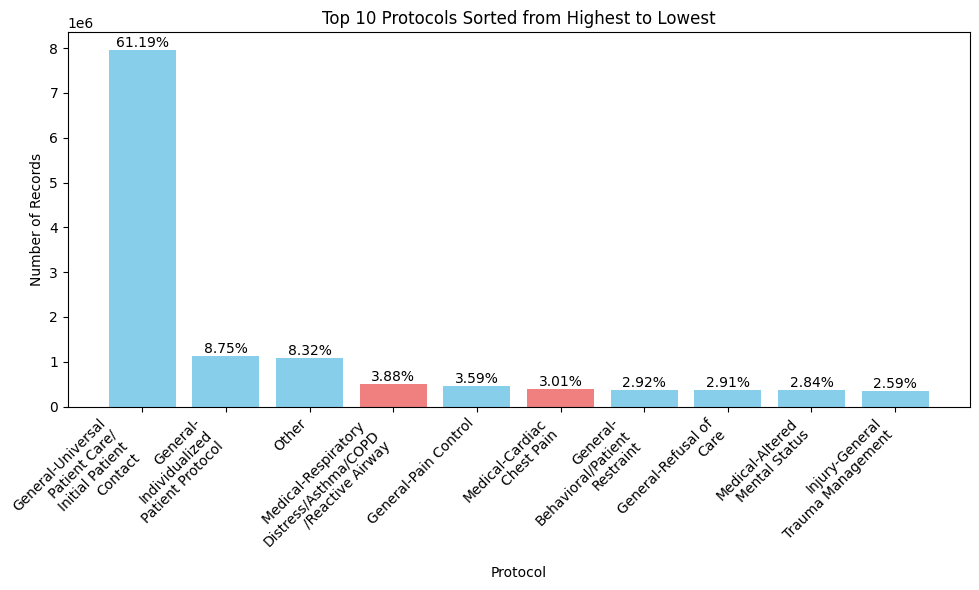

In [17]:
print(protocol_cnt)

# Sort the data by the number of records from highest to lowest and select the top 10
sorted_data = dict(sorted(protocol_cnt.items(), key=lambda item: item[1], reverse=True)[:10])

# Calculate the total number of records in the top 10 protocols
total_records = sum(sorted_data.values())
print(total_records
)
# Function to wrap labels
def wrap_labels(label, width):
    return "\n".join(textwrap.wrap(label, width))


# Plotting the data
protocols = list(sorted_data.keys())
numbers = list(sorted_data.values())

# Apply the wrapping function to each label
wrapped_labels = [wrap_labels(label, 20) for label in protocols]

# Determine bar colors based on whether the protocol contains "Cardiac" or "Respiratory"
colors = ['lightcoral' if 'Cardiac' in protocol or 'Respiratory' in protocol else 'skyblue' for protocol in sorted_data.keys()]

plt.figure(figsize=(10, 6))
bars = plt.bar(wrapped_labels, numbers, color=colors)
plt.ylabel('Number of Records')
plt.xlabel('Protocol')
plt.title('Top 10 Protocols Sorted from Highest to Lowest')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability

# Annotate the percentage on top of each bar
for bar, num in zip(bars, numbers):
    percentage = (num / total_records) * 100
    height = bar.get_height()

    # plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
    #          f'{percentage:.2f}%', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}%', ha='center', va='bottom') #for percentage

plt.tight_layout()  # Adjust layout to make space for x labels
plt.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Assuming protocol_cnt is your dictionary

# Remove specific general protocols
protocol_cnt_without_general = protocol_cnt.copy()
protocol_cnt_without_general.pop("General-Universal Patient Care/ Initial Patient Contact", None)
protocol_cnt_without_general.pop("Other", None)
protocol_cnt_without_general.pop("General-Individualized Patient Protocol", None)

# Sort the data by the number of records from highest to lowest and select the top 10
sorted_data = dict(sorted(protocol_cnt_without_general.items(), key=lambda item: item[1], reverse=True)[:10])

# Calculate the total number of records in the top 10 protocols
total_records = sum(sorted_data.values())

# Function to wrap labels
def wrap_labels(label, width):
    return "\n".join(textwrap.wrap(label, width))

# Plotting the data
protocols = list(sorted_data.keys())
numbers = list(sorted_data.values())

# Apply the wrapping function to each label
wrapped_labels = [wrap_labels(label, 20) for label in protocols]

# Determine bar colors based on whether the protocol contains "Cardiac" or "Respiratory"
colors = ['lightcoral' if 'Cardiac' in protocol or 'Respiratory' in protocol else 'skyblue' for protocol in sorted_data.keys()]

# Set Seaborn style for modern look
sns.set(style="whitegrid", palette="muted")

# Create the bar plot
plt.figure(figsize=(12, 7))
bars = sns.barplot(x=wrapped_labels, y=numbers, palette=colors)

# Add labels and title
plt.ylabel('Number of Records', fontsize=12)
plt.xlabel('Protocol', fontsize=12)
plt.title('Top 10 Protocols Without General Patient Care', fontsize=16, fontweight='bold')

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate percentage on top of each bar
for bar, num in zip(bars.patches, numbers):
    percentage = (num / total_records) * 100
    height = bar.get_height()
    bars.annotate(f'{percentage:.2f}%', (bar.get_x() + bar.get_width() / 2.0, height),
                  ha='center', va='bottom', fontsize=11)

# Remove top and right spines for a cleaner look
sns.despine()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'protocol_cnt' is not defined

Interventions/Procedures

In [18]:
print(df.head(5))

        PcrKey          Cause of Injury  \
0   81481800.0                      NaN   
1   97455081.0                      NaN   
2  118170828.0                      NaN   
3  118170835.0                      NaN   
4  118170842.0  Assault by bodily force   

                               Primary Symptoms  \
0                          Generalized pain NOS   
1       Encounter for adult health check-up NOS   
2                  Primary thunderclap headache   
3                       Chest pain, unspecified   
4  Unspecified injury of shoulder and upper arm   

                           Other Associated Symptoms  \
0  Elevated blood-pressure reading, without diagn...   
1                                                NaN   
2                   Other general symptoms and signs   
3                                                NaN   
4                                 Injury of face NOS   

                                 Primary Impressions  \
0                               Generaliz

In [19]:
procedures_cnt = {}
for i in range(len(df)):
    ps = df['Procedures'][i]
    if isinstance(ps, str):  # Check if ps is a string
        for p in ps.split(';'):
            if p != "":
                procedures_cnt[p] = procedures_cnt.get(p, 0) + 1

In [26]:
# Assuming procedures_cnt is your dictionary
procedures_df = pd.DataFrame(list(procedures_cnt.items()), columns=['Procedure', 'Count'])

# Save to CSV
procedures_df.to_csv(os.path.join(root,'Statistics','procedures_count.csv'), index=False)

# Display the DataFrame
print(procedures_df)

                                             Procedure    Count
0                     Evaluation procedure (procedure)  2329145
1           Continuous physical assessment (procedure)  1965552
2                  Catheterization of vein (procedure)  3840694
3           Taking orthostatic vital signs (procedure)  1335411
4                12 lead electrocardiogram (procedure)  2987489
..                                                 ...      ...
807  Assessment using mini-mental state examination...        8
808               Insertion of Port-a-cath (procedure)        1
809                   Closed chest suction (procedure)        1
810  Application of ambulatory blood pressure monit...       76
811                    Assessment of needs (procedure)      148

[812 rows x 2 columns]


In [22]:
if not os.path.exists(os.path.join(root, 'Statistics')):
    os.makedirs(os.path.join(root, 'Statistics'))
    
with open(os.path.join(root, 'Statistics', 'Procedure Numbers.json'), 'w') as f:
    json.dump(procedures_cnt, f, indent=4)

### Train test split